# Projects in Advanced Machine Learning Portfolio

This repo is comprised of three projects that I've completed for the course Advanced Projects in Machine Learning at the Graduate School of Arts and Sciences at Columbia University. This notebook will serve as an introduction to these projects.

# Project 1

This project attemps to use data from the World Happiness Survey to predict the levels of happiness of a country given a set of features.

Some preliminary visualizations revealed that GDP per capita is a good predictor of happiness levels, and that social support was loosely connected with hapiness levels, but also that perceptions of corruption did not seem to be linked with happiness levels as can be seen here:

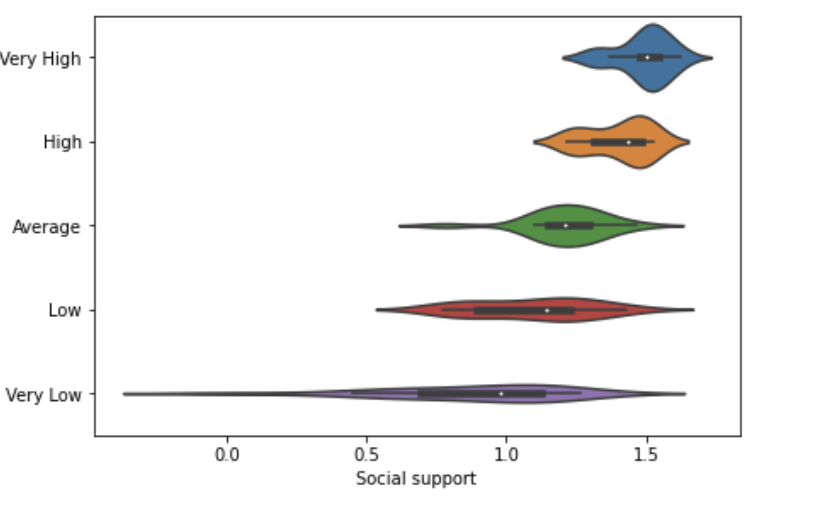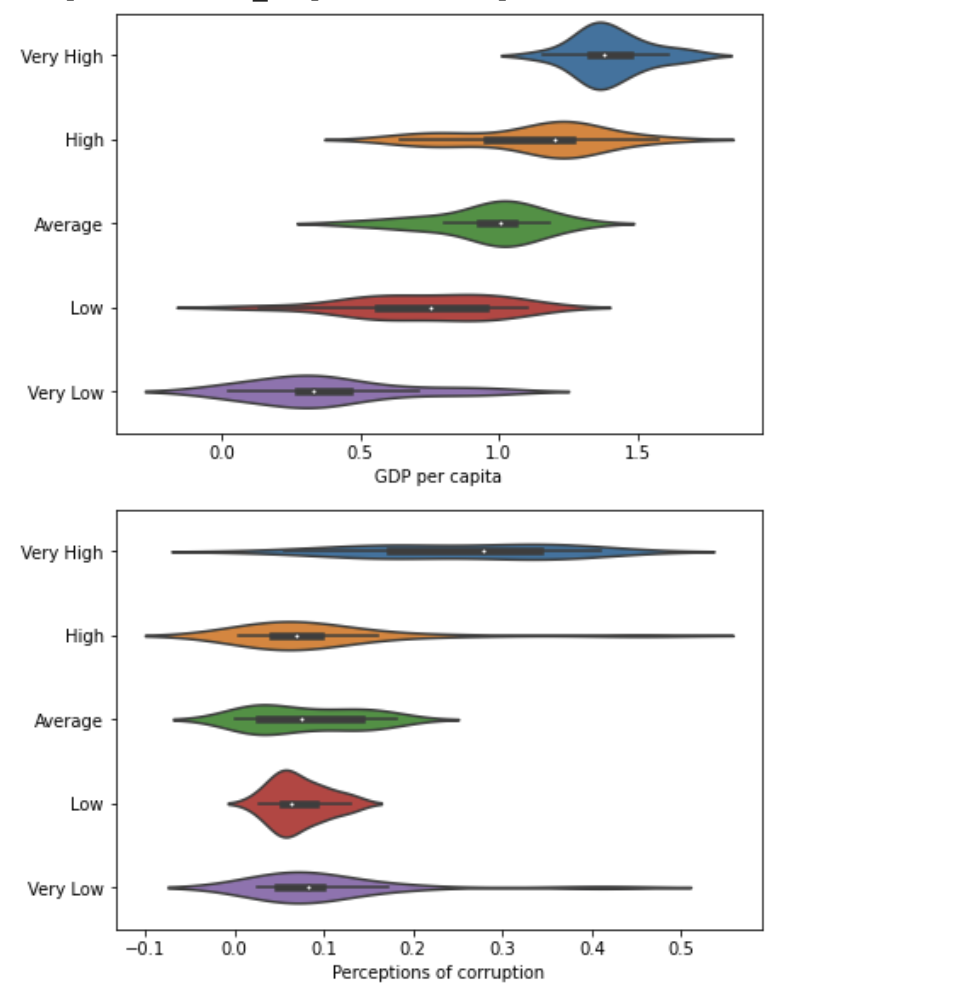

Of the 11 features in our training data, 8 of them were continuous numeric features and I ran a randomforest classifier model to extract feauture importances and found that GDP per capita, healthy life expectancy, and Social support were the most important features in predicting levels of happiness.

I then defined a preprocessing function which transforms the numeric data with the StandardScaler (Z-Score transformer), and ran three different models.

  * A Logistic Regression Model
  * A Random Forest Classifier Model
  * A K-Nearest-Neigbors Classifier Model

I used GridSearchCV to find optimal values for respective hyperparameters for each model, and found that a RandomForest classifier with a max depth of 30 and 100 estimators maximized mean cross-validation accuracy.

I then submitted these models to the aimodelshare leaderboard and after discussing among peers, decided to try a few other approaches.

I ran three more models

  * A Support Vector Machines Model
  * A Gradient Boosted Tree Model
  * A Voting Classifier Model

For all the first two models of my second try, I used GridSearchCV to optimize the respective hyperparameters to maximize mean cross validated accuracy. The voting classifier is an ensemble machine learning model that combines the predictions of each of the classifiers trained before it, and uses the majority vote of all models to make its prediction. Our best model was the Random Forest Classifier with an accuracy of 44.1% and an f1 score of 42% on test data (leaderboard). However, all of the models hovered in this range and more model tuning would likely have increased my predictive metrics

# Project 2

### Covid Positivity prediction through chest X-ray image classification

This projects uses a range of different image classification neural network architectures to predict whether a person is infected with COVID-19, Pneumonia, or neither.

These models can help healthcare professionals quickly and accurately diagnose patients with respiratory illnesses, and may also be used as a validation technique to help ascertain diagnoses.

The dataset on which I will be training these models are RGB images of chest X-rays of patients suspected to have respiratory diseases, and these images are labeled Covid, Pneumonia, or Normal.

Since the dataset was imbalanced, I subsetted it to the first 1344 images in all three categories (the size of the smallest category).

I then defined a preproccesor function for my X data which opens the image, converts it to "RGB", resizes it to 192x192, performs a min-max transformation of the array representation of the image, and reshapes it to the final dimensions that we want to train our neural network.

After splitting into training and testing sets, I trained models with a range of different architectures:

  1. My first model was a fully connected Neural Network that has 6 hidden layers. Given that this is an image classification problem, I will use Convolutional neural networks later on, but I want to start with a fully connected Neural Network to have a baseline from which I can build off of

  2. My second model was contained 6 convolutional hidden layers that used maxpooling layers to reduce dimensionality

  3. My third model used the pretrained weights from VGG16, popular convolutional neural network architecture for image classification and recognition tasks. I made sure to set parameters as untrainable so as to preserve the weights from Visual Geometry Group (VGG)

My first model was able to achive  validation accuracy of around 79%, and my second model was able to achieve validation accuracy of around 90%. Unfortunately my last model was not able to capture any signal and could not distinguish the images whatsoever (33% validation accuracy, the same as random as there are three classes).

I then discussed with peers about other model architectures and tried three more models:

  4. My fourth model used transfer learning from the pretrained weights of ResNet50, part of the family of convolutional neural network architectures. This architeture uses a combination of convolutional layers, pooling layers, and fully connected layers. 

  5. My fifth model used the same weights as my fourth model but I also addedseveral convolution layers with varying degrees of kernel size and filters and a flatten layer.

  6. My sixth model used pretrained weights from the DenseNet121 pretrained weights, which has been known to be particularly suited to medical image analysis.


My fourth and fifth models did not appreciably predict covid/pneumonia positivity, with test accuracy scores of 46% and 33%, but the DenseNet architecture did relatively well with a test set accuracy of 89%.


After submitting these models to the leaderboard, I decided to augment some of my image data to increase the diversity of patterns in the data to try and capture more signal. I used the ImageDataGenerator submodule to  zoom, rescale, and flip the training images . I then used my most predictive model architecture (model 2) to try and predict covid positivity with the new dataset, and the test set accuracy actually went down to 77.61%. However this might be due to too few epochs.





# Project 3

### Stanford Sentiment Treebank - Movie Review Classification Competition

The focus of this project is to predict the sentiment of movie reviews taken from The Stanford Sentiment Treebank, which is a collection of movie reviews obtained from the Rotten Tomatoes website. The SST dataset has gained widespread popularity as a benchmark dataset for training and evaluating sentiment analysis models in the field of natural language processing. Interested individuals can access the original dataset [here](https://nlp.stanford.edu/sentiment/index.html#download)


I first downloaded the data from aimodelshare, then built a vocabulary by using the Tokenizer submodule from Keras and fitting it on the movie review dataset and keeping the top 10000 most frequently occuring words. The X data are just the raw reviews and the Y data are labels for whether that review is positive or negative. I then defined a preprocessor function that tokenizes the words from the reviews and makes sure that the maximum length of each review is 40 words. after applying my preprocesssing function to my X data, I have 6920 reviews of training data (40 words each) and 1821 reviews of test data (40 words each) and trained my model on three different neural network architectures. Each model was run for 20 epochs with the rmsprop optimizer and callbacks that save the best model (by validation accuracy) and Reduces learning rate when Val_acc hasn't improved in 2 epochs.


  1. My first model used an embeddings layer and an LSTM layer with 32 neurons
  2. My second model used an embeddings layer with a one-dimensional convolution layer
  3. My third model used transfer learning using pretrained GloVe embeddings


My first two models were identical in performance, with a validation accuracy of 80.2%, but the third model was slighlty better and able to achieve 85% validation accuracy.

After submitting the models to the leaderboard, I added three more model architectures.

  4. My fourth model had an embeddings layer, a conv1d layer, and also added a dropout layer which randomly drops out (sets to zero) a fraction of the input units, which means that the corresponding activations are effectively ignored By randomly dropping out some of the units in the layer, the dropout layer helps to prevent the network from relying too heavily on any particular input features

  5. My fifth model used an embeddings layer and two LSTM layers with a dropout layer. The first LSTM layer had 64 units and the second had 32 units and in this case, 20% of the input units will be randomly set to 0 during each training epoch.

  6. For my final model, I used the keras_tuner library to tune for optimal hyperparameters that would maximize validation accuracy. This model had an embeddings layer and an LSTM layer.

My fourth model was able to achieve 79.19% validation accuracy, and my fifth model was able to achieve 85% validation accuracy. The validation accuracy of the tuned model only reached around 76% accuracy, but could improve with further parameter tuning.

